### Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
sys.path.append('../..')
from definitions import EXPIREMENTS_DIR

In [2]:
sns.set_style(style="whitegrid")
sns.set_palette("deep")

### Load data frames

In [3]:
def load_dataframes() -> pd.DataFrame:

    dataframes = []

    for filename in os.listdir(EXPIREMENTS_DIR):

        csv_path = os.path.join(EXPIREMENTS_DIR, filename, 'history.csv')

        if os.path.exists(csv_path):
            csv_file = pd.read_csv(csv_path)
            csv_file['experiment'] = filename

            dataframes.append(csv_file)
    
    return pd.concat(dataframes)

In [4]:
dfs = load_dataframes()

### Plotting

In [5]:
def plot_folds(dfs: pd.DataFrame, metric: str):
    plot_df = dfs[dfs['split'] == 'val'].groupby(by=['experiment', 'fold']).max()[[metric]].reset_index()
    ax = sns.barplot(data=plot_df, x='fold', y=metric, hue='experiment')
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [17]:
def plot_mean(dfs : pd.DataFrame,metric : str):
    
    plot_df = dfs[dfs['split'] == 'val'].groupby(by=['experiment', 'fold']).max()[[metric]].reset_index()
    plot_df = plot_df.drop(columns=['fold']).groupby(by='experiment').mean().reset_index()

    ax = sns.barplot(data=plot_df, x='experiment', y=metric)

    ax.tick_params(axis="x", rotation=90)

    for i in ax.containers:
        ax.bar_label(i,rotation=90, label_type='edge',fmt='%.3f')

    ax.set_ylabel(f'Mean {metric}')

In [7]:
def plot_std(dfs : pd.DataFrame,metric : str):
    
    plot_df = dfs[dfs['split'] == 'val'].groupby(by=['experiment', 'fold']).max()[[metric]].reset_index()
    plot_df = plot_df.drop(columns=['fold']).groupby(by='experiment').std().reset_index()

    ax = sns.barplot(data=plot_df, x='experiment', y=metric)

    ax.tick_params(axis="x", rotation=90)


    for i in ax.containers:
        ax.bar_label(i,rotation=90, label_type='edge',fmt='%.4f')

    ax.set_ylabel(f'Std {metric}')

In [22]:
def plot_lb_vs_cv_mean(df : pd.DataFrame,lb : pd.DataFrame):

    plot_df = df[df['split'] == 'val'].groupby(by=['experiment', 'fold']).max()[['pauc']].reset_index()
    plot_df = plot_df.drop(columns=['fold']).groupby(by='experiment').mean().reset_index()

    plot_df = plot_df.merge(lb, on='experiment')
    plot_df = plot_df[['experiment','LB-PAUC','pauc']]
    plot_df = plot_df.melt(id_vars='experiment', value_vars=['LB-PAUC','pauc'], var_name='metric', value_name='value')

    ax = sns.barplot(data=plot_df, x='experiment', y='value', hue='metric')

    ax.tick_params(axis="x", rotation=90)

    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

    for i in ax.containers:
        ax.bar_label(i,rotation=90,label_type='edge',fmt='%.3f')

- comparing different fold results

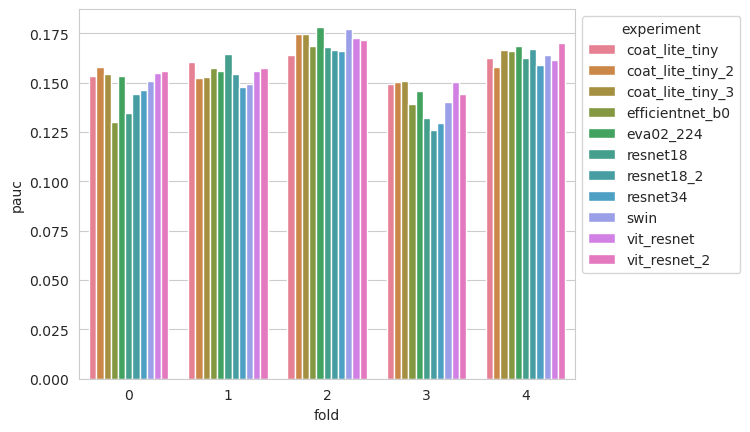

In [9]:
plot_folds(dfs, 'pauc')

- comparing the mean

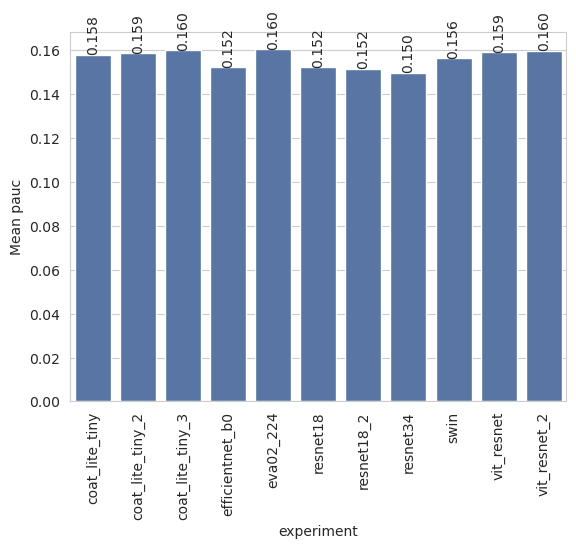

In [10]:
plot_mean(dfs, 'pauc')

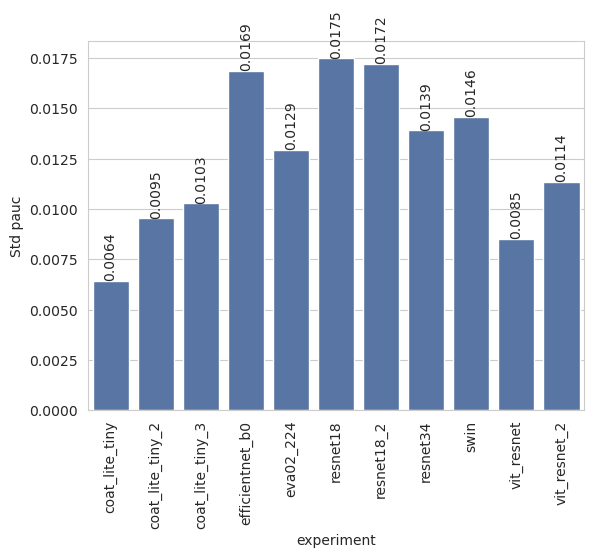

In [11]:
plot_std(dfs, 'pauc')

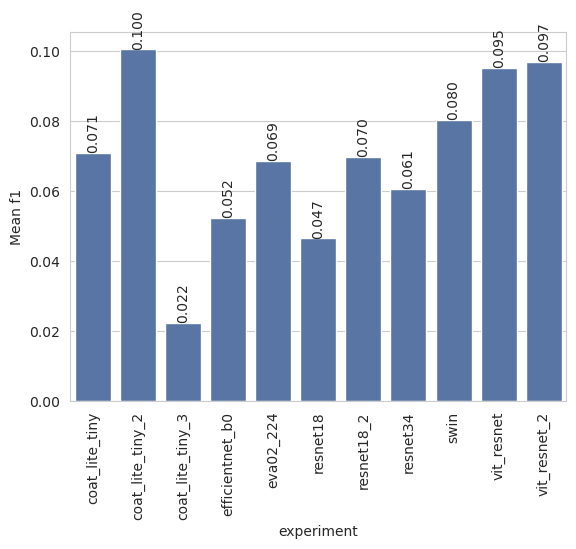

In [12]:
plot_mean(dfs, 'f1')

In [13]:
lb = pd.Series({
    "efficientnet_b0": 0.149,
    "resnet18" : 0.150,
    "resnet18_2" : 0.149,
    "swin" : 0.158,
    "vit_resnet" : 0.144,
    "vit_resnet_2" : 0.149,
    "resnet34" : 0.146,
    "coat_lite_tiny" : 0.157,
    'eva02_224' : 0.156,
    'coat_lite_tiny_2' : 0.158
}).reset_index().rename(columns={'index':'experiment', 0:'LB-PAUC'})

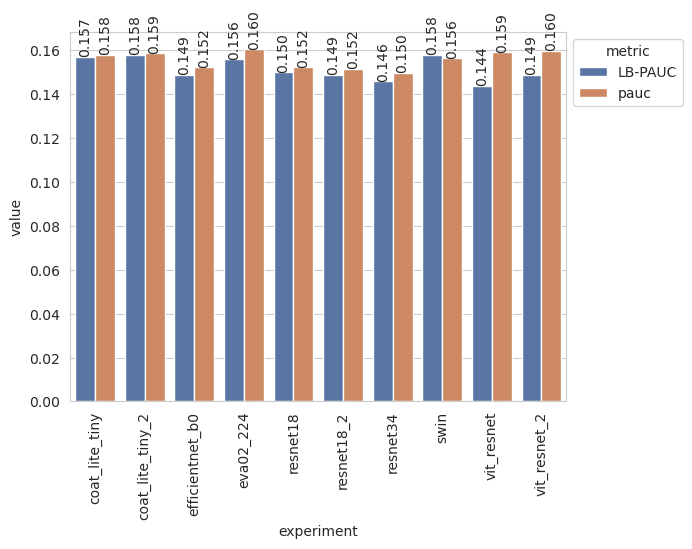

In [14]:
plot_lb_vs_cv_mean(dfs, lb)

In [15]:
estimated_submission_time = pd.Series({
    'coat_lite_tiny': 73.54,
    'eva02_tiny_patch14_224': 59.58,
    'swin_tiny_patch4_window7_224' : 120,
    'resnet18' : 21,
    'vit_resnet' : 12,
    'efficientnet_b0' : 24,
}).reset_index().rename(columns={ 'index':'experiment', 0:'time in minutes'})

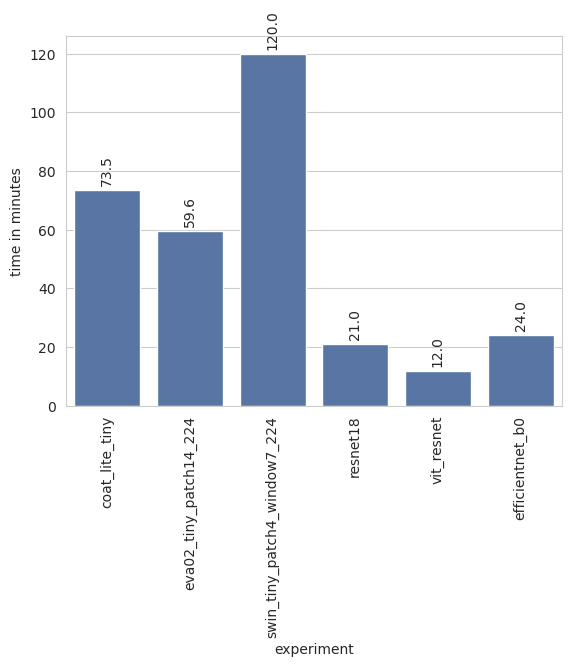

In [16]:
ax = sns.barplot(data=estimated_submission_time, x='experiment', y='time in minutes')

ax.tick_params(axis="x", rotation=90)

for i in ax.containers:
    ax.bar_label(i,rotation=90, label_type='edge',fmt='%.1f',padding=3)